In [7]:
# 1. ANALISIS DISTRIBUSI SENTIMEN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load data hasil prediksi
df_full = pd.read_excel('dataset_full_with_predictions.xlsx')

print("="*70)
print("ANALISIS DISTRIBUSI SENTIMEN PROGRAM MAKAN BERGIZI GRATIS")
print("Dataset: 6,000 Komentar Reddit (2024-2025)")
print("="*70)

# 1. STATISTIK DASAR DISTRIBUSI SENTIMEN
print("\n📊 1. DISTRIBUSI SENTIMEN")
print("-" * 70)

sentiment_counts = df_full['predicted_sentiment'].value_counts()
sentiment_pct = df_full['predicted_sentiment'].value_counts(normalize=True) * 100

# Tabel distribusi
print(f"\n{'Kategori':<15} {'Jumlah':<12} {'Persentase':<15} {'Visual'}")
print("-" * 70)

for sentiment in ['positif', 'negatif', 'netral']:
    count = sentiment_counts.get(sentiment, 0)
    pct = sentiment_pct.get(sentiment, 0)
    bar = '█' * int(pct / 2)  # Visual bar

    print(f"{sentiment.capitalize():<15} {count:<12} {pct:>6.2f}%        {bar}")

# 2. STATISTIK CONFIDENCE SCORE
print("\n\n📈 2. ANALISIS CONFIDENCE SCORE")
print("-" * 70)

# Overall statistics
print(f"\nStatistik Keseluruhan:")
print(f"  Rata-rata    : {df_full['confidence_score'].mean():.4f}")
print(f"  Median       : {df_full['confidence_score'].median():.4f}")
print(f"  Std Deviasi  : {df_full['confidence_score'].std():.4f}")
print(f"  Min          : {df_full['confidence_score'].min():.4f}")
print(f"  Max          : {df_full['confidence_score'].max():.4f}")

# Per sentiment statistics
print(f"\nStatistik per Kategori Sentimen:")
print(f"{'Sentimen':<12} {'Mean':<10} {'Median':<10} {'Std Dev':<10} {'Min':<10} {'Max'}")
print("-" * 70)

for sentiment in ['positif', 'negatif', 'netral']:
    data = df_full[df_full['predicted_sentiment'] == sentiment]['confidence_score']
    if len(data) > 0:
        print(f"{sentiment.capitalize():<12} {data.mean():<10.4f} {data.median():<10.4f} "
              f"{data.std():<10.4f} {data.min():<10.4f} {data.max():.4f}")

# 3. DISTRIBUSI BERDASARKAN THRESHOLD CONFIDENCE
print("\n\n🎯 3. DISTRIBUSI BERDASARKAN CONFIDENCE THRESHOLD")
print("-" * 70)

thresholds = [
    (0.9, 1.0, "Sangat Tinggi"),
    (0.8, 0.9, "Tinggi"),
    (0.7, 0.8, "Sedang"),
    (0.0, 0.7, "Rendah")
]

print(f"\n{'Kategori':<20} {'Range':<15} {'Jumlah':<10} {'Persentase'}")
print("-" * 70)

for low, high, label in thresholds:
    if high == 1.0:
        count = len(df_full[(df_full['confidence_score'] >= low) &
                            (df_full['confidence_score'] <= high)])
    else:
        count = len(df_full[(df_full['confidence_score'] >= low) &
                            (df_full['confidence_score'] < high)])
    pct = (count / len(df_full)) * 100
    print(f"{label:<20} [{low:.1f} - {high:.1f}]     {count:<10} {pct:>6.2f}%")

# 4. ANALISIS LOW CONFIDENCE CASES
print("\n\n⚠️ 4. ANALISIS KASUS LOW CONFIDENCE (<0.7)")
print("-" * 70)

low_conf = df_full[df_full['confidence_score'] < 0.7]
print(f"\nTotal kasus low confidence: {len(low_conf)} ({len(low_conf)/len(df_full)*100:.2f}%)")

if len(low_conf) > 0:
    print(f"\nDistribusi sentimen pada kasus low confidence:")
    for sentiment in ['positif', 'negatif', 'netral']:
        count = len(low_conf[low_conf['predicted_sentiment'] == sentiment])
        print(f"  {sentiment.capitalize()}: {count} kasus")

    print(f"\n5 Contoh kasus low confidence:")
    for i, (idx, row) in enumerate(low_conf.nsmallest(5, 'confidence_score').iterrows(), 1):
        print(f"\n  {i}. Prediksi: {row['predicted_sentiment'].upper()} (conf: {row['confidence_score']:.4f})")
        print(f"     Prob: Pos={row['prob_positif']:.3f} | Neg={row['prob_negatif']:.3f} | Net={row['prob_netral']:.3f}")
        print(f"     Text: {row['comment_translated'][:120]}...")

print("\n" + "="*70)

ANALISIS DISTRIBUSI SENTIMEN PROGRAM MAKAN BERGIZI GRATIS
Dataset: 6,000 Komentar Reddit (2024-2025)

📊 1. DISTRIBUSI SENTIMEN
----------------------------------------------------------------------

Kategori        Jumlah       Persentase      Visual
----------------------------------------------------------------------
Positif         2147          34.11%        █████████████████
Negatif         406            6.45%        ███
Netral          3742          59.44%        █████████████████████████████


📈 2. ANALISIS CONFIDENCE SCORE
----------------------------------------------------------------------

Statistik Keseluruhan:
  Rata-rata    : 0.8502
  Median       : 0.9332
  Std Deviasi  : 0.1777
  Min          : 0.0000
  Max          : 0.9985

Statistik per Kategori Sentimen:
Sentimen     Mean       Median     Std Dev    Min        Max
----------------------------------------------------------------------
Positif      0.8280     0.8873     0.1596     0.3560     0.9982
Negatif      0.7

/tmp/ipython-input-1606839058.py:107: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax4.boxplot(data_for_box,


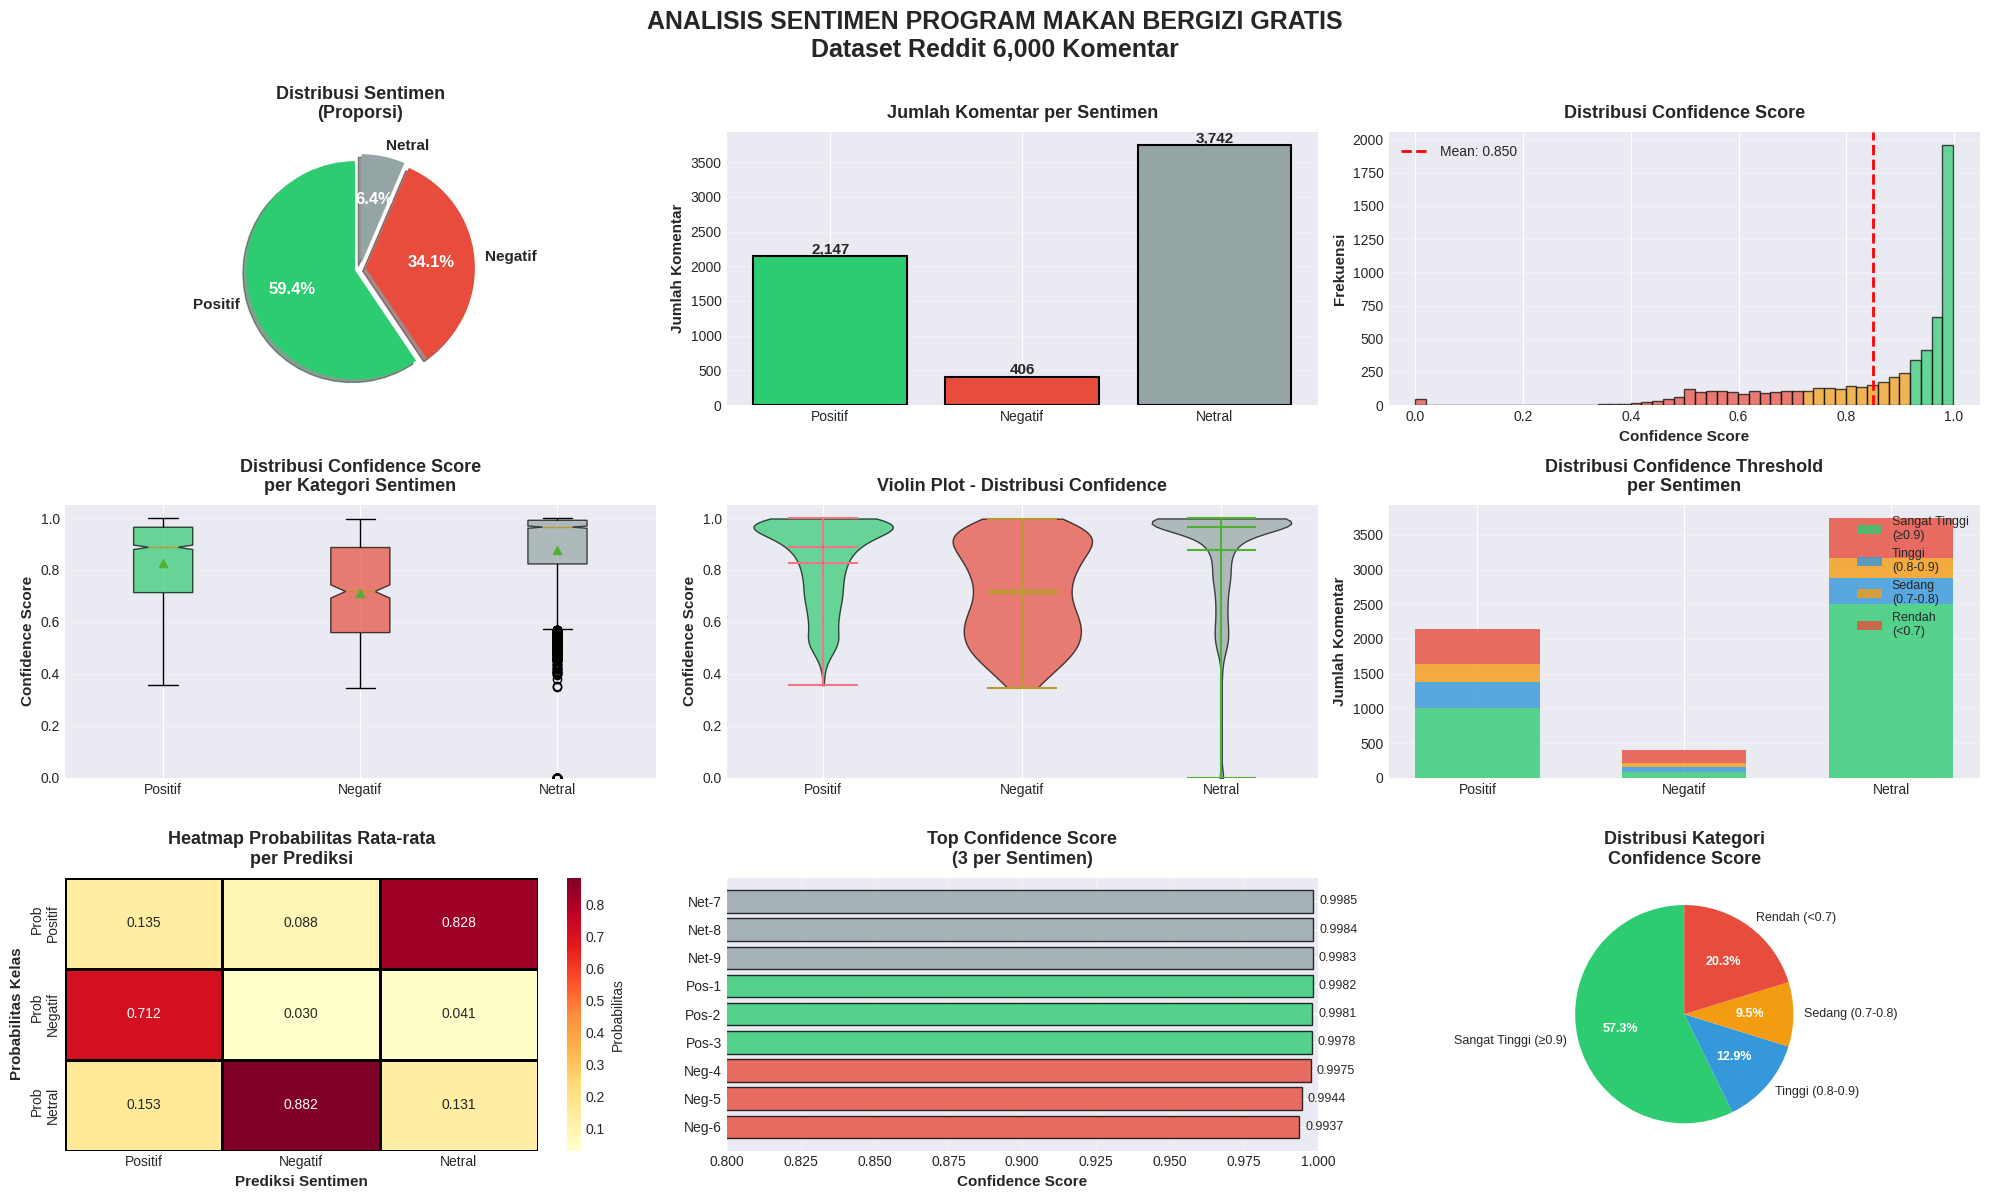


✅ Visualisasi komprehensif tersimpan: 'visualisasi_komprehensif.png'


In [8]:
# 2. VISUALISASI KOMPREHENSIF
# SETUP FIGURE UNTUK MULTIPLE PLOTS
fig = plt.figure(figsize=(20, 12))
fig.suptitle('ANALISIS SENTIMEN PROGRAM MAKAN BERGIZI GRATIS\nDataset Reddit 6,000 Komentar',
             fontsize=18, fontweight='bold', y=0.995)

# COLOR SCHEME
colors = {
    'positif': '#2ecc71',  # Hijau
    'negatif': '#e74c3c',  # Merah
    'netral': '#95a5a6'    # Abu-abu
}

color_list = [colors['positif'], colors['negatif'], colors['netral']]

# ============================================
# PLOT 1: PIE CHART - DISTRIBUSI SENTIMEN
# ============================================
ax1 = plt.subplot(3, 3, 1)

wedges, texts, autotexts = ax1.pie(
    sentiment_counts,
    labels=['Positif', 'Negatif', 'Netral'],
    colors=color_list,
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.05, 0.05, 0.05),
    shadow=True,
    textprops={'fontsize': 11, 'fontweight': 'bold'}
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)

ax1.set_title('Distribusi Sentimen\n(Proporsi)', fontsize=13, fontweight='bold', pad=10)

# ============================================
# PLOT 2: BAR CHART - JUMLAH PER SENTIMEN
# ============================================
ax2 = plt.subplot(3, 3, 2)

bars = ax2.bar(
    ['Positif', 'Negatif', 'Netral'],
    [sentiment_counts.get('positif', 0),
     sentiment_counts.get('negatif', 0),
     sentiment_counts.get('netral', 0)],
    color=color_list,
    edgecolor='black',
    linewidth=1.5
)

# Tambahkan nilai di atas bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontweight='bold', fontsize=11)

ax2.set_ylabel('Jumlah Komentar', fontsize=11, fontweight='bold')
ax2.set_title('Jumlah Komentar per Sentimen', fontsize=13, fontweight='bold', pad=10)
ax2.grid(axis='y', alpha=0.3)
ax2.set_axisbelow(True)

# ============================================
# PLOT 3: HISTOGRAM - DISTRIBUSI CONFIDENCE SCORE
# ============================================
ax3 = plt.subplot(3, 3, 3)

n, bins, patches = ax3.hist(
    df_full['confidence_score'],
    bins=50,
    color='skyblue',
    edgecolor='black',
    alpha=0.7
)

# Color bars berdasarkan threshold
for i, patch in enumerate(patches):
    if bins[i] >= 0.9:
        patch.set_facecolor('#2ecc71')
    elif bins[i] >= 0.7:
        patch.set_facecolor('#f39c12')
    else:
        patch.set_facecolor('#e74c3c')

mean_conf = df_full['confidence_score'].mean()
ax3.axvline(mean_conf, color='red', linestyle='--', linewidth=2,
            label=f'Mean: {mean_conf:.3f}')
ax3.set_xlabel('Confidence Score', fontsize=11, fontweight='bold')
ax3.set_ylabel('Frekuensi', fontsize=11, fontweight='bold')
ax3.set_title('Distribusi Confidence Score', fontsize=13, fontweight='bold', pad=10)
ax3.legend(fontsize=10)
ax3.grid(axis='y', alpha=0.3)

# ============================================
# PLOT 4: BOX PLOT - CONFIDENCE PER SENTIMEN
# ============================================
ax4 = plt.subplot(3, 3, 4)

data_for_box = [
    df_full[df_full['predicted_sentiment'] == 'positif']['confidence_score'],
    df_full[df_full['predicted_sentiment'] == 'negatif']['confidence_score'],
    df_full[df_full['predicted_sentiment'] == 'netral']['confidence_score']
]

bp = ax4.boxplot(data_for_box,
                 labels=['Positif', 'Negatif', 'Netral'],
                 patch_artist=True,
                 notch=True,
                 showmeans=True)

# Color boxes
for patch, color in zip(bp['boxes'], color_list):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax4.set_ylabel('Confidence Score', fontsize=11, fontweight='bold')
ax4.set_title('Distribusi Confidence Score\nper Kategori Sentimen',
              fontsize=13, fontweight='bold', pad=10)
ax4.grid(axis='y', alpha=0.3)
ax4.set_ylim([0, 1.05])

# ============================================
# PLOT 5: VIOLIN PLOT - CONFIDENCE PER SENTIMEN
# ============================================
ax5 = plt.subplot(3, 3, 5)

positions = [0, 1, 2]
for i, (sentiment, color) in enumerate(zip(['positif', 'negatif', 'netral'], color_list)):
    data = df_full[df_full['predicted_sentiment'] == sentiment]['confidence_score']
    parts = ax5.violinplot([data], positions=[i], showmeans=True,
                           showmedians=True, widths=0.7)
    for pc in parts['bodies']:
        pc.set_facecolor(color)
        pc.set_alpha(0.7)
        pc.set_edgecolor('black')

ax5.set_xticks([0, 1, 2])
ax5.set_xticklabels(['Positif', 'Negatif', 'Netral'])
ax5.set_ylabel('Confidence Score', fontsize=11, fontweight='bold')
ax5.set_title('Violin Plot - Distribusi Confidence', fontsize=13, fontweight='bold', pad=10)
ax5.set_ylim([0, 1.05])
ax5.grid(axis='y', alpha=0.3)

# ============================================
# PLOT 6: STACKED BAR - CONFIDENCE THRESHOLD
# ============================================
ax6 = plt.subplot(3, 3, 6)

threshold_data = {
    'Sangat Tinggi\n(≥0.9)': [],
    'Tinggi\n(0.8-0.9)': [],
    'Sedang\n(0.7-0.8)': [],
    'Rendah\n(<0.7)': []
}

for sentiment in ['positif', 'negatif', 'netral']:
    sent_data = df_full[df_full['predicted_sentiment'] == sentiment]['confidence_score']
    threshold_data['Sangat Tinggi\n(≥0.9)'].append(len(sent_data[sent_data >= 0.9]))
    threshold_data['Tinggi\n(0.8-0.9)'].append(len(sent_data[(sent_data >= 0.8) & (sent_data < 0.9)]))
    threshold_data['Sedang\n(0.7-0.8)'].append(len(sent_data[(sent_data >= 0.7) & (sent_data < 0.8)]))
    threshold_data['Rendah\n(<0.7)'].append(len(sent_data[sent_data < 0.7]))

x = np.arange(3)
width = 0.6
bottom = np.zeros(3)

threshold_colors = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']

for (label, values), color in zip(threshold_data.items(), threshold_colors):
    ax6.bar(x, values, width, label=label, bottom=bottom, color=color, alpha=0.8)
    bottom += values

ax6.set_xticks(x)
ax6.set_xticklabels(['Positif', 'Negatif', 'Netral'])
ax6.set_ylabel('Jumlah Komentar', fontsize=11, fontweight='bold')
ax6.set_title('Distribusi Confidence Threshold\nper Sentimen',
              fontsize=13, fontweight='bold', pad=10)
ax6.legend(fontsize=9, loc='upper right')
ax6.grid(axis='y', alpha=0.3)

# ============================================
# PLOT 7: HEATMAP - PROBABILITAS RATA-RATA
# ============================================
ax7 = plt.subplot(3, 3, 7)

prob_matrix = df_full.groupby('predicted_sentiment')[
    ['prob_positif', 'prob_negatif', 'prob_netral']
].mean()

prob_matrix.index = ['Positif', 'Negatif', 'Netral']
prob_matrix.columns = ['Prob\nPositif', 'Prob\nNegatif', 'Prob\nNetral']

sns.heatmap(prob_matrix.T, annot=True, fmt='.3f', cmap='YlOrRd',
            cbar_kws={'label': 'Probabilitas'}, ax=ax7,
            linewidths=1, linecolor='black')

ax7.set_xlabel('Prediksi Sentimen', fontsize=11, fontweight='bold')
ax7.set_ylabel('Probabilitas Kelas', fontsize=11, fontweight='bold')
ax7.set_title('Heatmap Probabilitas Rata-rata\nper Prediksi',
              fontsize=13, fontweight='bold', pad=10)

# ============================================
# PLOT 8: HORIZONTAL BAR - TOP CONFIDENCE
# ============================================
ax8 = plt.subplot(3, 3, 8)

# Ambil top 5 confidence dari masing-masing sentimen
top_samples = []
for sentiment, color in zip(['positif', 'negatif', 'netral'], color_list):
    top = df_full[df_full['predicted_sentiment'] == sentiment].nlargest(3, 'confidence_score')
    for idx, row in top.iterrows():
        top_samples.append({
            'label': f"{sentiment.capitalize()[:3]}-{len(top_samples)+1}",
            'confidence': row['confidence_score'],
            'color': color
        })

# Sort by confidence
top_samples = sorted(top_samples, key=lambda x: x['confidence'])

labels = [s['label'] for s in top_samples]
confidences = [s['confidence'] for s in top_samples]
colors_bars = [s['color'] for s in top_samples]

ax8.barh(labels, confidences, color=colors_bars, alpha=0.8, edgecolor='black')
ax8.set_xlabel('Confidence Score', fontsize=11, fontweight='bold')
ax8.set_title('Top Confidence Score\n(3 per Sentimen)', fontsize=13, fontweight='bold', pad=10)
ax8.set_xlim([0.8, 1.0])
ax8.grid(axis='x', alpha=0.3)

# Tambahkan nilai
for i, v in enumerate(confidences):
    ax8.text(v + 0.002, i, f'{v:.4f}', va='center', fontsize=9)

# ============================================
# PLOT 9: PIE CHART - CONFIDENCE CATEGORIES
# ============================================
ax9 = plt.subplot(3, 3, 9)

conf_categories = {
    'Sangat Tinggi (≥0.9)': len(df_full[df_full['confidence_score'] >= 0.9]),
    'Tinggi (0.8-0.9)': len(df_full[(df_full['confidence_score'] >= 0.8) &
                                     (df_full['confidence_score'] < 0.9)]),
    'Sedang (0.7-0.8)': len(df_full[(df_full['confidence_score'] >= 0.7) &
                                     (df_full['confidence_score'] < 0.8)]),
    'Rendah (<0.7)': len(df_full[df_full['confidence_score'] < 0.7])
}

wedges, texts, autotexts = ax9.pie(
    conf_categories.values(),
    labels=conf_categories.keys(),
    colors=['#2ecc71', '#3498db', '#f39c12', '#e74c3c'],
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 9}
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

ax9.set_title('Distribusi Kategori\nConfidence Score', fontsize=13, fontweight='bold', pad=10)

plt.tight_layout()
plt.savefig('visualisasi_komprehensif.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualisasi komprehensif tersimpan: 'visualisasi_komprehensif.png'")


WORD CLOUD ANALYSIS

📊 Generating WordCloud - Sentimen Positif...
  Top 10 kata: makan(866), buat(587), gratis(538), sekolah(535), tapi(534)

📊 Generating WordCloud - Sentimen Negatif...
  Top 10 kata: makan(54), orang(45), face(37), anak(34), kamu(33)

📊 Generating WordCloud - Sentimen Netral...
  Top 10 kata: makan(1132), gratis(768), sekolah(693), saja(647), bergizi(559)

📊 Generating WordCloud - Keseluruhan...
  Top 10 kata: makan(2052), gratis(1327), sekolah(1243), saja(1210), buat(1088)


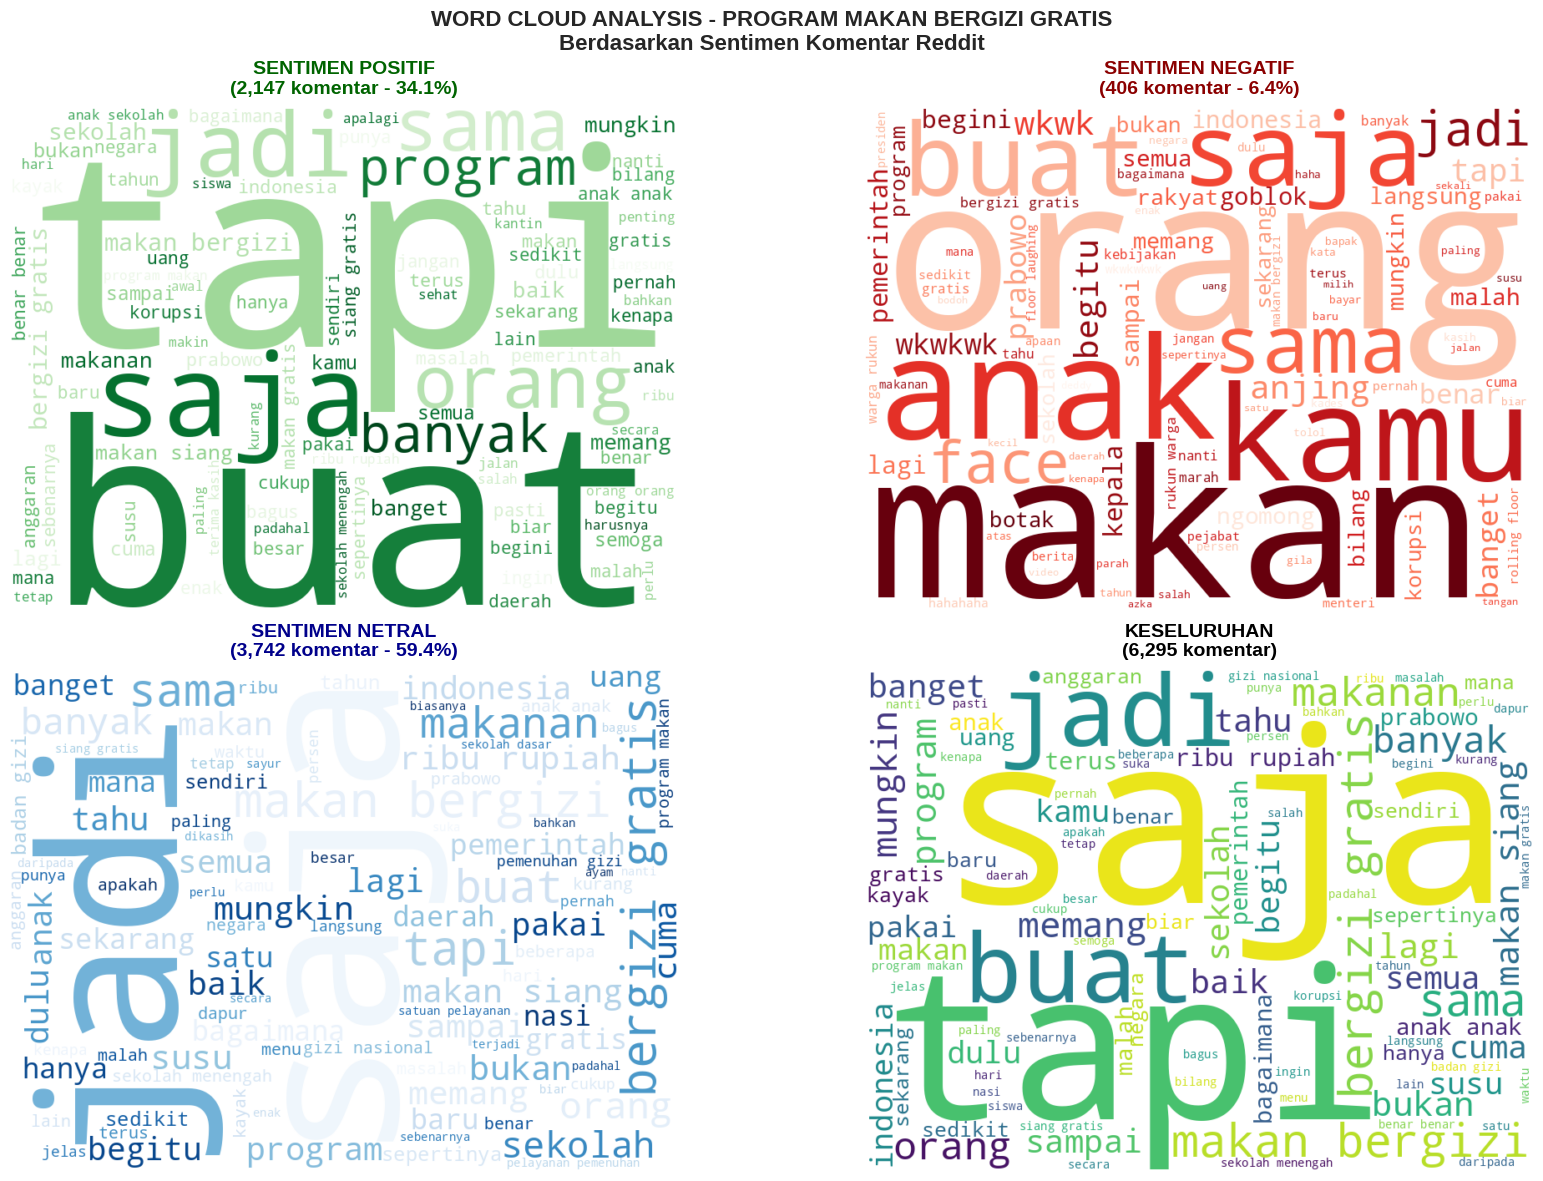


✅ WordCloud analysis tersimpan: 'wordcloud_analysis.png'


In [9]:
# 3. Analisis Visualisasi
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fungsi preprocessing untuk wordcloud
def preprocess_for_wordcloud(texts):
    """
    Preprocessing khusus untuk wordcloud
    """
    # Stopwords Bahasa Indonesia
    stopwords = set([
        'yang', 'dan', 'di', 'dari', 'ini', 'itu', 'dengan', 'untuk',
        'pada', 'adalah', 'ke', 'dalam', 'oleh', 'sebagai', 'juga',
        'akan', 'ada', 'tidak', 'atau', 'bisa', 'dapat', 'sudah',
        'saya', 'kita', 'mereka', 'kami', 'dia', 'nya', 'anda',
        'seperti', 'lebih', 'sangat', 'tersebut', 'harus', 'belum',
        'telah', 'masih', 'kalau', 'jika', 'namun', 'karena', 'saat',
        'setelah', 'ketika', 'antara', 'tentang', 'bahwa', 'hingga',
        'sehingga', 'maka', 'the', 'a', 'an', 'of', 'to', 'in', 'for'
    ])

    all_words = []
    for text in texts:
        # Lowercase dan tokenize
        words = text.lower().split()
        # Filter stopwords dan kata pendek
        words = [w for w in words if w not in stopwords and len(w) > 3]
        all_words.extend(words)

    return ' '.join(all_words)

# Generate WordCloud untuk setiap sentimen
print("\n" + "="*70)
print("WORD CLOUD ANALYSIS")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('WORD CLOUD ANALYSIS - PROGRAM MAKAN BERGIZI GRATIS\nBerdasarkan Sentimen Komentar Reddit',
             fontsize=16, fontweight='bold')

# ============================================
# WORDCLOUD 1: SENTIMEN POSITIF
# ============================================
print("\n📊 Generating WordCloud - Sentimen Positif...")
positif_texts = df_full[df_full['predicted_sentiment'] == 'positif']['comment_translated'].tolist()
positif_text = preprocess_for_wordcloud(positif_texts)

wordcloud_pos = WordCloud(
    width=800,
    height=600,
    background_color='white',
    colormap='Greens',
    max_words=100,
    relative_scaling=0.5,
    min_font_size=10,
    contour_width=2,
    contour_color='darkgreen'
).generate(positif_text)

axes[0, 0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0, 0].axis('off')
axes[0, 0].set_title(f'SENTIMEN POSITIF\n({len(positif_texts):,} komentar - {len(positif_texts)/len(df_full)*100:.1f}%)',
                     fontsize=14, fontweight='bold', color='darkgreen', pad=10)

# Top 10 kata positif
words_pos = positif_text.split()
top_pos = Counter(words_pos).most_common(10)
print(f"  Top 10 kata: {', '.join([f'{w}({c})' for w, c in top_pos[:5]])}")

# ============================================
# WORDCLOUD 2: SENTIMEN NEGATIF
# ============================================
print("\n📊 Generating WordCloud - Sentimen Negatif...")
negatif_texts = df_full[df_full['predicted_sentiment'] == 'negatif']['comment_translated'].tolist()
negatif_text = preprocess_for_wordcloud(negatif_texts)

wordcloud_neg = WordCloud(
    width=800,
    height=600,
    background_color='white',
    colormap='Reds',
    max_words=100,
    relative_scaling=0.5,
    min_font_size=10,
    contour_width=2,
    contour_color='darkred'
).generate(negatif_text)

axes[0, 1].imshow(wordcloud_neg, interpolation='bilinear')
axes[0, 1].axis('off')
axes[0, 1].set_title(f'SENTIMEN NEGATIF\n({len(negatif_texts):,} komentar - {len(negatif_texts)/len(df_full)*100:.1f}%)',
                     fontsize=14, fontweight='bold', color='darkred', pad=10)

# Top 10 kata negatif
words_neg = negatif_text.split()
top_neg = Counter(words_neg).most_common(10)
print(f"  Top 10 kata: {', '.join([f'{w}({c})' for w, c in top_neg[:5]])}")

# ============================================
# WORDCLOUD 3: SENTIMEN NETRAL
# ============================================
print("\n📊 Generating WordCloud - Sentimen Netral...")
netral_texts = df_full[df_full['predicted_sentiment'] == 'netral']['comment_translated'].tolist()
netral_text = preprocess_for_wordcloud(netral_texts)

wordcloud_net = WordCloud(
    width=800,
    height=600,
    background_color='white',
    colormap='Blues',
    max_words=100,
    relative_scaling=0.5,
    min_font_size=10,
    contour_width=2,
    contour_color='darkblue'
).generate(netral_text)

axes[1, 0].imshow(wordcloud_net, interpolation='bilinear')
axes[1, 0].axis('off')
axes[1, 0].set_title(f'SENTIMEN NETRAL\n({len(netral_texts):,} komentar - {len(netral_texts)/len(df_full)*100:.1f}%)',
                     fontsize=14, fontweight='bold', color='darkblue', pad=10)

# Top 10 kata netral
words_net = netral_text.split()
top_net = Counter(words_net).most_common(10)
print(f"  Top 10 kata: {', '.join([f'{w}({c})' for w, c in top_net[:5]])}")

# ============================================
# WORDCLOUD 4: KESELURUHAN
# ============================================
print("\n📊 Generating WordCloud - Keseluruhan...")
all_texts = df_full['comment_translated'].tolist()
all_text = preprocess_for_wordcloud(all_texts)

wordcloud_all = WordCloud(
    width=800,
    height=600,
    background_color='white',
    colormap='viridis',
    max_words=100,
    relative_scaling=0.5,
    min_font_size=10,
    contour_width=2,
    contour_color='black'
).generate(all_text)

axes[1, 1].imshow(wordcloud_all, interpolation='bilinear')
axes[1, 1].axis('off')
axes[1, 1].set_title(f'KESELURUHAN\n({len(all_texts):,} komentar)',
                     fontsize=14, fontweight='bold', color='black', pad=10)

# Top 10 kata keseluruhan
words_all = all_text.split()
top_all = Counter(words_all).most_common(10)
print(f"  Top 10 kata: {', '.join([f'{w}({c})' for w, c in top_all[:5]])}")

plt.tight_layout()
plt.savefig('wordcloud_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ WordCloud analysis tersimpan: 'wordcloud_analysis.png'")

In [10]:
# 4.ANALISIS KATA KUNCI DETAIL
from collections import Counter
import pandas as pd

print("\n" + "="*70)
print("ANALISIS KATA KUNCI DETAIL")
print("="*70)

# Fungsi ekstraksi kata kunci
def extract_keywords(texts, top_n=20, stopwords=None):
    """Extract most frequent words"""
    if stopwords is None:
        stopwords = set([
            'yang', 'dan', 'di', 'dari', 'ini', 'itu', 'dengan', 'untuk',
            'pada', 'adalah', 'ke', 'dalam', 'oleh', 'sebagai', 'juga',
            'akan', 'ada', 'tidak', 'atau', 'bisa', 'dapat', 'sudah',
            'saya', 'kita', 'mereka', 'kami', 'dia', 'nya', 'anda',
            'seperti', 'lebih', 'sangat', 'tersebut', 'harus', 'belum',
            'telah', 'masih', 'kalau', 'jika', 'namun', 'karena', 'saat'
        ])

    all_words = []
    for text in texts:
        words = text.lower().split()
        words = [w for w in words if w not in stopwords and len(w) > 3]
        all_words.extend(words)

    return Counter(all_words).most_common(top_n)

# Analisis per sentimen
for sentiment, emoji in zip(['positif', 'negatif', 'netral'], ['🟢', '🔴', '⚪']):
    print(f"\n{emoji} TOP 20 KATA KUNCI - SENTIMEN {sentiment.upper()}")
    print("-" * 70)

    texts = df_full[df_full['predicted_sentiment'] == sentiment]['comment_translated'].tolist()
    keywords = extract_keywords(texts, top_n=20)

    # Tampilkan dalam format tabel
    print(f"{'No.':<5} {'Kata':<20} {'Frekuensi':<12} {'Visual'}")
    print("-" * 70)

    max_freq = keywords[0][1] if keywords else 1
    for i, (word, freq) in enumerate(keywords, 1):
        bar_length = int((freq / max_freq) * 30)
        bar = '█' * bar_length
        print(f"{i:<5} {word:<20} {freq:<12} {bar}")

# Analisis kata kunci spesifik terkait Program MBG
print("\n\n🔍 ANALISIS KATA KUNCI SPESIFIK - PROGRAM MBG")
print("="*70)

# Kata kunci yang dicari
keywords_mbg = {
    'Program & Kebijakan': ['program', 'kebijakan', 'pemerintah', 'gratis', 'bergizi', 'makanan', 'makan', 'mbg'],
    'Target & Penerima': ['anak', 'siswa', 'pelajar', 'balita', 'sekolah', 'ibu', 'hamil'],
    'Dampak & Manfaat': ['gizi', 'sehat', 'nutrisi', 'kesehatan', 'pendidikan', 'prestasi', 'stunting'],
    'Anggaran & Ekonomi': ['anggaran', 'dana', 'biaya', 'rupiah', 'miliar', 'triliun', 'apbn', 'apbd'],
    'Implementasi': ['implementasi', 'pelaksanaan', 'distribusi', 'pengadaan', 'pengawasan', 'evaluasi'],
    'Opini Publik': ['bagus', 'baik', 'buruk', 'jelek', 'setuju', 'tidak', 'mendukung', 'menolak']
}

all_text = ' '.join(df_full['comment_translated'].tolist()).lower()

for category, words in keywords_mbg.items():
    print(f"\n📌 {category}")
    print("-" * 70)
    print(f"{'Kata Kunci':<20} {'Frekuensi':<12} {'Visual'}")
    print("-" * 70)

    word_counts = []
    for word in words:
        count = all_text.count(word)
        if count > 0:
            word_counts.append((word, count))

    # Sort by frequency
    word_counts.sort(key=lambda x: x[1], reverse=True)

    max_count = word_counts[0][1] if word_counts else 1
    for word, count in word_counts:
        bar_length = int((count / max_count) * 30)
        bar = '█' * bar_length
        print(f"{word:<20} {count:<12} {bar}")

    if not word_counts:
        print("  Tidak ditemukan kata kunci dari kategori ini")

# Analisis co-occurrence kata kunci
print("\n\n🔗 ANALISIS CO-OCCURRENCE KATA KUNCI")
print("="*70)
print("Kata kunci yang sering muncul bersamaan:\n")

target_words = ['program', 'gratis', 'makanan', 'bergizi', 'pemerintah']

for word1 in target_words:
    cooccur = {}
    for text in df_full['comment_translated'].tolist():
        text_lower = text.lower()
        if word1 in text_lower:
            for word2 in target_words:
                if word2 != word1 and word2 in text_lower:
                    cooccur[word2] = cooccur.get(word2, 0) + 1

    if cooccur:
        sorted_cooccur = sorted(cooccur.items(), key=lambda x: x[1], reverse=True)
        top_3 = sorted_cooccur[:3]
        print(f"'{word1}' sering dengan: {', '.join([f'{w}({c})' for w, c in top_3])}")

print("\n" + "="*70)


ANALISIS KATA KUNCI DETAIL

🟢 TOP 20 KATA KUNCI - SENTIMEN POSITIF
----------------------------------------------------------------------
No.   Kata                 Frekuensi    Visual
----------------------------------------------------------------------
1     makan                866          ██████████████████████████████
2     buat                 587          ████████████████████
3     gratis               538          ██████████████████
4     sekolah              535          ██████████████████
5     tapi                 534          ██████████████████
6     saja                 532          ██████████████████
7     orang                505          █████████████████
8     jadi                 468          ████████████████
9     anak                 467          ████████████████
10    program              376          █████████████
11    sama                 351          ████████████
12    bergizi              338          ███████████
13    banyak               303          ████

In [11]:
# 5. TABEL RINGKASAN UNTUK LAPORAN
# Generate tabel ringkasan untuk dimasukkan ke laporan

print("\n" + "="*70)
print("TABEL RINGKASAN UNTUK LAPORAN")
print("="*70)

# TABEL 1: Distribusi Sentimen
print("\n📋 TABEL 1: DISTRIBUSI SENTIMEN HASIL PREDIKSI")
print("-" * 70)

table1 = pd.DataFrame({
    'Kategori Sentimen': ['Positif', 'Negatif', 'Netral', 'Total'],
    'Jumlah Komentar': [
        sentiment_counts.get('positif', 0),
        sentiment_counts.get('negatif', 0),
        sentiment_counts.get('netral', 0),
        len(df_full)
    ],
    'Persentase (%)': [
        sentiment_pct.get('positif', 0),
        sentiment_pct.get('negatif', 0),
        sentiment_pct.get('netral', 0),
        100.0
    ]
})

print(table1.to_string(index=False))
table1.to_excel('tabel_distribusi_sentimen.xlsx', index=False)

# TABEL 2: Statistik Confidence Score
print("\n\n📋 TABEL 2: STATISTIK CONFIDENCE SCORE PER SENTIMEN")
print("-" * 70)

stats_data = []
for sentiment in ['Positif', 'Negatif', 'Netral']:
    sent_lower = sentiment.lower()
    data = df_full[df_full['predicted_sentiment'] == sent_lower]['confidence_score']

    stats_data.append({
        'Sentimen': sentiment,
        'Mean': f"{data.mean():.4f}",
        'Median': f"{data.median():.4f}",
        'Std Dev': f"{data.std():.4f}",
        'Min': f"{data.min():.4f}",
        'Max': f"{data.max():.4f}"
    })

# Tambahkan overall
data_all = df_full['confidence_score']
stats_data.append({
    'Sentimen': 'Keseluruhan',
    'Mean': f"{data_all.mean():.4f}",
    'Median': f"{data_all.median():.4f}",
    'Std Dev': f"{data_all.std():.4f}",
    'Min': f"{data_all.min():.4f}",
    'Max': f"{data_all.max():.4f}"
})

table2 = pd.DataFrame(stats_data)
print(table2.to_string(index=False))
table2.to_excel('tabel_confidence_score.xlsx', index=False)

# TABEL 3: Distribusi Berdasarkan Confidence Threshold
print("\n\n📋 TABEL 3: DISTRIBUSI BERDASARKAN CONFIDENCE THRESHOLD")
print("-" * 70)

threshold_data = []
thresholds = [
    ('Sangat Tinggi', 0.9, 1.0),
    ('Tinggi', 0.8, 0.9),
    ('Sedang', 0.7, 0.8),
    ('Rendah', 0.0, 0.7)
]

for label, low, high in thresholds:
    if high == 1.0:
        count = len(df_full[(df_full['confidence_score'] >= low) &
                            (df_full['confidence_score'] <= high)])
    else:
        count = len(df_full[(df_full['confidence_score'] >= low) &
                            (df_full['confidence_score'] < high)])

    threshold_data.append({
        'Kategori': label,
        'Range Score': f"[{low:.1f} - {high:.1f}]",
        'Jumlah': count,
        'Persentase (%)': f"{(count/len(df_full)*100):.2f}"
    })

table3 = pd.DataFrame(threshold_data)
print(table3.to_string(index=False))
table3.to_excel('tabel_confidence_threshold.xlsx', index=False)

# TABEL 4: Top 10 Kata Kunci per Sentimen
print("\n\n📋 TABEL 4: TOP 10 KATA KUNCI PER SENTIMEN")
print("-" * 70)

for sentiment in ['positif', 'negatif', 'netral']:
    texts = df_full[df_full['predicted_sentiment'] == sentiment]['comment_translated'].tolist()
    keywords = extract_keywords(texts, top_n=10)

    print(f"\n{sentiment.upper()}:")
    table4 = pd.DataFrame(keywords, columns=['Kata', 'Frekuensi'])
    table4.insert(0, 'Ranking', range(1, len(table4) + 1))
    print(table4.to_string(index=False))

    # Save to Excel
    table4.to_excel(f'tabel_keywords_{sentiment}.xlsx', index=False)

print("\n✅ Semua tabel tersimpan dalam format Excel")


TABEL RINGKASAN UNTUK LAPORAN

📋 TABEL 1: DISTRIBUSI SENTIMEN HASIL PREDIKSI
----------------------------------------------------------------------
Kategori Sentimen  Jumlah Komentar  Persentase (%)
          Positif             2147       34.106434
          Negatif              406        6.449563
           Netral             3742       59.444003
            Total             6295      100.000000


📋 TABEL 2: STATISTIK CONFIDENCE SCORE PER SENTIMEN
----------------------------------------------------------------------
   Sentimen   Mean Median Std Dev    Min    Max
    Positif 0.8280 0.8873  0.1596 0.3560 0.9982
    Negatif 0.7120 0.7172  0.1852 0.3470 0.9975
     Netral 0.8779 0.9650  0.1780 0.0000 0.9985
Keseluruhan 0.8502 0.9332  0.1777 0.0000 0.9985


📋 TABEL 3: DISTRIBUSI BERDASARKAN CONFIDENCE THRESHOLD
----------------------------------------------------------------------
     Kategori Range Score  Jumlah Persentase (%)
Sangat Tinggi [0.9 - 1.0]    3605          57.27
      


ANALISIS KOMPARATIF ANTAR SENTIMEN

📏 1. ANALISIS PANJANG TEKS
----------------------------------------------------------------------

Sentimen     Rata-rata    Median     Min      Max
----------------------------------------------------------------------
Positif      31.4         18         1        355
Negatif      12.6         7          1        275
Netral       25.4         15         1        763


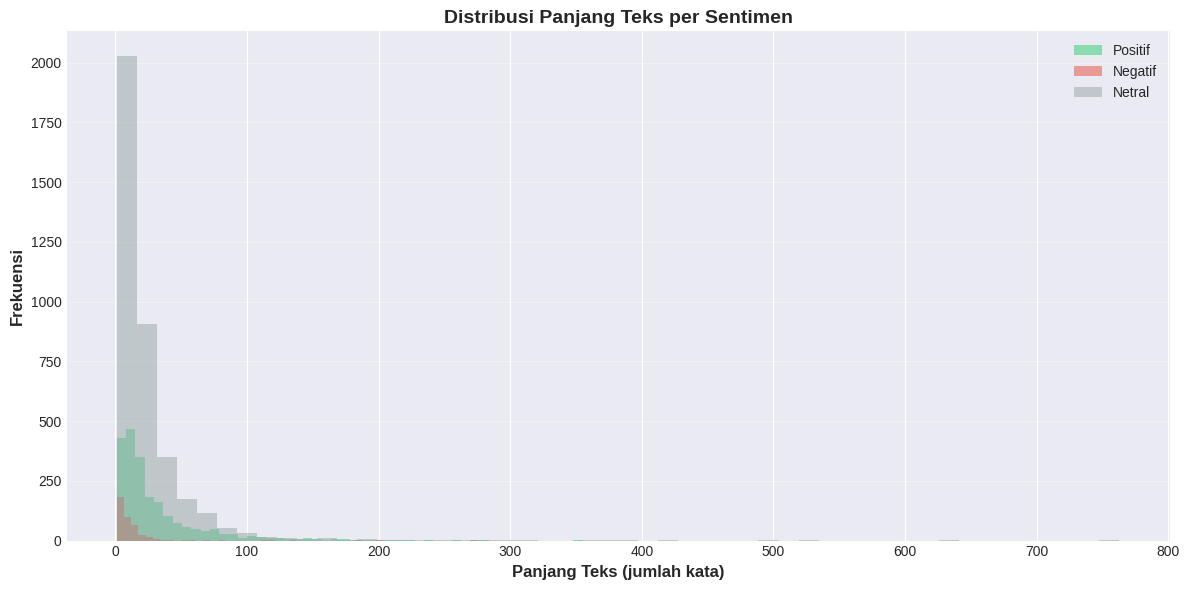



📊 2. PERFORMA PADA TEKS PENDEK VS PANJANG
----------------------------------------------------------------------

Kategori Panjang          Jumlah     Conf Mean    Sentimen Dominan
----------------------------------------------------------------------
Sangat Pendek (≤10)       2053       0.8332       Netral
Pendek (11-20)            1816       0.8662       Netral
Sedang (21-50)            1636       0.8521       Netral
Panjang (>50)             790        0.8535       Netral


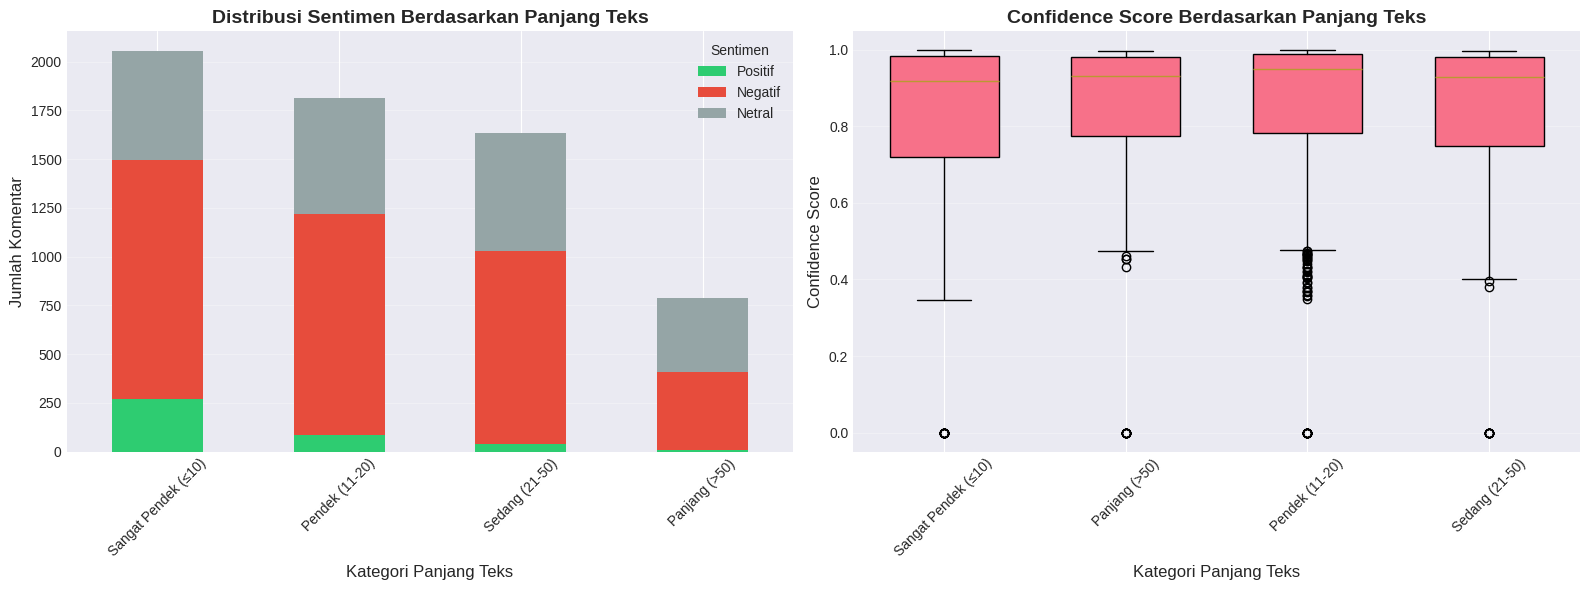


✅ Visualisasi analisis panjang teks tersimpan


🔤 3. ANALISIS KATA UNIK PER SENTIMEN
----------------------------------------------------------------------

📌 Kata yang DOMINAN di Sentimen Positif:
  • semoga: 187 kali
  • bagus: 147 kali
  • kasih: 145 kali
  • sehat: 116 kali

📌 Kata yang DOMINAN di Sentimen Negatif:

📌 Kata yang DOMINAN di Sentimen Netral:
  • bergizi: 559 kali
  • makanan: 524 kali
  • ribu: 402 kali
  • gizi: 330 kali
  • susu: 298 kali
  • rupiah: 293 kali
  • tahu: 257 kali
  • badan: 229 kali
  • daerah: 215 kali
  • pakai: 202 kali



In [12]:
# 6. ANALISIS KOMPARATIF SENTIMEN
print("\n" + "="*70)
print("ANALISIS KOMPARATIF ANTAR SENTIMEN")
print("="*70)

# 1. Panjang Teks per Sentimen
print("\n📏 1. ANALISIS PANJANG TEKS")
print("-" * 70)

df_full['text_length'] = df_full['comment_translated'].str.split().str.len()

print(f"\n{'Sentimen':<12} {'Rata-rata':<12} {'Median':<10} {'Min':<8} {'Max'}")
print("-" * 70)

for sentiment in ['positif', 'negatif', 'netral']:
    lengths = df_full[df_full['predicted_sentiment'] == sentiment]['text_length']
    print(f"{sentiment.capitalize():<12} {lengths.mean():<12.1f} {lengths.median():<10.0f} "
          f"{lengths.min():<8} {lengths.max()}")

# Visualisasi panjang teks
fig, ax = plt.subplots(figsize=(12, 6))

for sentiment, color in zip(['positif', 'negatif', 'netral'], color_list):
    data = df_full[df_full['predicted_sentiment'] == sentiment]['text_length']
    ax.hist(data, bins=50, alpha=0.5, label=sentiment.capitalize(), color=color)

ax.set_xlabel('Panjang Teks (jumlah kata)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frekuensi', fontsize=12, fontweight='bold')
ax.set_title('Distribusi Panjang Teks per Sentimen', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('distribusi_panjang_teks.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Analisis Sentimen pada Teks Pendek vs Panjang
print("\n\n📊 2. PERFORMA PADA TEKS PENDEK VS PANJANG")
print("-" * 70)

# Kategorisasi berdasarkan panjang
df_full['length_category'] = pd.cut(
    df_full['text_length'],
    bins=[0, 10, 20, 50, float('inf')],
    labels=['Sangat Pendek (≤10)', 'Pendek (11-20)', 'Sedang (21-50)', 'Panjang (>50)']
)

print(f"\n{'Kategori Panjang':<25} {'Jumlah':<10} {'Conf Mean':<12} {'Sentimen Dominan'}")
print("-" * 70)

for category in ['Sangat Pendek (≤10)', 'Pendek (11-20)', 'Sedang (21-50)', 'Panjang (>50)']:
    subset = df_full[df_full['length_category'] == category]
    if len(subset) > 0:
        conf_mean = subset['confidence_score'].mean()
        dominant = subset['predicted_sentiment'].mode()[0] if len(subset) > 0 else 'N/A'
        print(f"{category:<25} {len(subset):<10} {conf_mean:<12.4f} {dominant.capitalize()}")

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Count per kategori
category_sentiment = pd.crosstab(df_full['length_category'], df_full['predicted_sentiment'])
category_sentiment.plot(kind='bar', stacked=True, ax=axes[0], color=color_list)
axes[0].set_title('Distribusi Sentimen Berdasarkan Panjang Teks', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Kategori Panjang Teks', fontsize=12)
axes[0].set_ylabel('Jumlah Komentar', fontsize=12)
axes[0].legend(title='Sentimen', labels=['Positif', 'Negatif', 'Netral'])
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Subplot 2: Confidence per kategori
for category in df_full['length_category'].unique():
    if pd.notna(category):
        data = df_full[df_full['length_category'] == category]['confidence_score']
        axes[1].boxplot([data], positions=[list(df_full['length_category'].unique()).index(category)],
                       widths=0.6, patch_artist=True)

axes[1].set_xticks(range(len(df_full['length_category'].unique())))
axes[1].set_xticklabels(df_full['length_category'].unique(), rotation=45)
axes[1].set_title('Confidence Score Berdasarkan Panjang Teks', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Kategori Panjang Teks', fontsize=12)
axes[1].set_ylabel('Confidence Score', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('analisis_panjang_teks.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualisasi analisis panjang teks tersimpan")

# 3. Analisis Kata Unik per Sentimen
print("\n\n🔤 3. ANALISIS KATA UNIK PER SENTIMEN")
print("-" * 70)

def get_unique_words(sentiment, other_sentiments, top_n=10):
    """Dapatkan kata yang unik/dominan di satu sentimen"""
    sent_texts = df_full[df_full['predicted_sentiment'] == sentiment]['comment_translated'].tolist()
    other_texts = df_full[df_full['predicted_sentiment'].isin(other_sentiments)]['comment_translated'].tolist()

    sent_words = Counter(preprocess_for_wordcloud(sent_texts).split())
    other_words = Counter(preprocess_for_wordcloud(other_texts).split())

    # Kata yang lebih sering muncul di sentimen ini
    unique = {}
    for word, count in sent_words.most_common(50):
        if count > 5:  # Minimal muncul 5 kali
            ratio = count / (other_words.get(word, 0.1) + 1)  # +1 untuk avoid division by zero
            if ratio > 1.5:  # Minimal 1.5x lebih sering
                unique[word] = count

    return sorted(unique.items(), key=lambda x: x[1], reverse=True)[:top_n]

print("\n📌 Kata yang DOMINAN di Sentimen Positif:")
unique_pos = get_unique_words('positif', ['negatif', 'netral'])
for word, count in unique_pos:
    print(f"  • {word}: {count} kali")

print("\n📌 Kata yang DOMINAN di Sentimen Negatif:")
unique_neg = get_unique_words('negatif', ['positif', 'netral'])
for word, count in unique_neg:
    print(f"  • {word}: {count} kali")

print("\n📌 Kata yang DOMINAN di Sentimen Netral:")
unique_net = get_unique_words('netral', ['positif', 'negatif'])
for word, count in unique_net:
    print(f"  • {word}: {count} kali")

print("\n" + "="*70)